In [1]:
! ../build/tools/sz3/sz3 -f -i /home/pji228/workspace/data/aramco_1008x1008x352/pressure_2000.f32.dat -o test_interp.out -3 352 1008 1008 -M REL 0.0004 -c sz3_interp.config -a 
! ../build/tools/sz3/sz3 -f -i /home/pji228/workspace/data/aramco_1008x1008x352/pressure_2000.f32.dat -o test_reg.out -3 352 1008 1008 -M REL 0.0014 -c sz3.config -a 


compression ratio = 78.55 
bit-rate  = 0.407396
compression time = 6.297391
compressed data file = /home/pji228/workspace/data/aramco_1008x1008x352/pressure_2000.f32.dat.sz.tmp
interpolator : cubic
interpolation direction :0 1 2 
Min=-46.052581787109375, Max=40.39642333984375, range=86.449005126953125
Max absolute error = 0.035
Max relative error = 0.0004
Max pw relative error = 1.4E+36
PSNR = 78.142779, NRMSE= 0.0001238400329
normError = 202.466382, normErr_norm = 0.008032
acEff=0.999968
compression ratio = 78.547637
bit-rate  = 0.407396
decompression time = 2.473318 seconds.
decompressed file = test_interp.out
 use regression2: 0
use fast version
compression ratio = 73.03 
bit-rate  = 0.438190
compression time = 6.081362
compressed data file = /home/pji228/workspace/data/aramco_1008x1008x352/pressure_2000.f32.dat.sz.tmp
Min=-46.052581787109375, Max=40.39642333984375, range=86.449005126953125
Max absolute error = 0.12
Max relative error = 0.0014
Max pw relative error = 2.2E+35
PSNR = 

In [9]:
! ../build/tools/artifact/test_interp_error /home/pji228/workspace/data/aramco_1008x1008x352/pressure_2000.f32.dat test_reg.out 3 352 1008 1008 0.0001

normalization time = 0.452776s
get_critical_points_map time = 20.522s
local_range = 0.0001
pattern match time = 1.07868s
match_count: 10
detection_time = 21.6007


In [5]:
import numpy as np
import matplotlib.pyplot as plt
p2000_path="/home/pji228/workspace/data/aramco_1008x1008x352/pressure_2000.f32.dat"
p2000=np.fromfile(p2000_path,dtype=np.float32).reshape(1008,1008,352)
p2000_reg = np.fromfile("test_reg.out",dtype=np.float32).reshape(1008,1008,352)
p2000_max = np.max(p2000)
p2000_min = np.min(p2000)
p2000_range = p2000_max - p2000_min
error =  p2000-p2000_reg

In [45]:
p2000 = (p2000 - p2000_min) / p2000_range
p2000_reg = (p2000_reg - p2000_min) / p2000_range
p2000_reg[p2000_reg<0] = 0
p2000_reg[p2000_reg>1] = 1

In [6]:
def plot3(data1, data2, idx, idy, window, same_scale=False):
    fig, axs = plt.subplots(1, 3, figsize=(8, 6))
    original = data1[idx-window:idx+window+1,idy-window:idy+window+1].copy()
    decompresss = data2[idx-window:idx+window+1,idy-window:idy+window+1].copy()
    original = original.astype(np.float32)
    decompresss = decompresss.astype(np.float32)
    error = original -decompresss
    
    # decompresss = original - decompresss
    print("original.shape",original.shape)
    original.tofile("original.bin")
    decompresss.tofile("decompresss.bin")
    color = 'coolwarm'
    if same_scale == 1:
        vmax = original.max()
        vmin = original.min()
        im1 = axs[0].imshow(original, vmax=vmax, vmin=vmin, interpolation='none', cmap=color)
        plt.colorbar(im1, ax=axs[0])
        axs[0].set_title('Original')
        im2 = axs[1].imshow(decompresss, vmax=vmax, vmin=vmin, interpolation='none', cmap=color)
        plt.colorbar(im2, ax=axs[1])
        axs[1].set_title('Decompressed')
        im3 = axs[2].imshow(error,interpolation='none', cmap=color)
        plt.colorbar(im3, ax=axs[2])
        axs[2].set_title('Error')
        
    elif same_scale == 2:
        vmax = data1.max()
        vmin = data1.min()
        im1 = axs[0].imshow(original, vmax=vmax, vmin=vmin, interpolation='none', cmap=color)
        axs[0].set_title('orig')
        im2 = axs[1].imshow(decompresss, vmax=vmax, vmin=vmin, interpolation='none', cmap=color)
        axs[1].set_title('decompressed')
        im3 = axs[2].imshow(error,interpolation='none', cmap=color)
        axs[2].set_title('Error')
    else:
        im1 = axs[0].imshow(original, interpolation='none', cmap=color)
        axs[0].set_title('orig')
        plt.colorbar(im1, ax=axs[0],fraction=0.046, pad=0.04)
        im2 = axs[1].imshow(decompresss, interpolation='none', cmap=color)
        axs[1].set_title('decompressed')
        plt.colorbar(im2, ax=axs[1],fraction=0.046, pad=0.04)
        im3 = axs[2].imshow(error,interpolation='none', cmap=color)
        axs[2].set_title('Error')
        plt.colorbar(im3, ax=axs[2],fraction=0.046, pad=0.04)

In [7]:
dmap = np.fromfile("cp_map_dcomp.dat",dtype=np.int32).reshape(1008,1008,352)
omap = np.fromfile("cp_map_orig.dat",dtype=np.int32).reshape(1008,1008,352)
emap = np.fromfile("cp_map_error.dat",dtype=np.int32).reshape(1008,1008,352)
match_index = np.fromfile("match_index.dat",dtype=np.int32)
print("match_index.size",match_index.size)

FileNotFoundError: [Errno 2] No such file or directory: 'cp_map_dcomp.dat'

159895403
450 648 107
original.shape (21, 21)
original.shape (21, 21)
original.shape (21, 21)
emap
 [[ 2 -4  2]
 [-4 -6 -4]
 [ 2 -4 -2]]
emap
 [[ 2 -4  2]
 [-4 -6 -4]
 [-2 -4  0]]
emap
 [[ 2 -4  6]
 [-4 -6 -4]
 [-2 -4  0]]
dmap
 [[-2  4  0]
 [ 4  6  4]
 [ 0  4  2]]
dmap
 [[ 0  4 -2]
 [ 4  6  4]
 [ 2  4  0]]
dmap
 [[ 0  4 -4]
 [ 4  6  4]
 [ 2  4  0]]


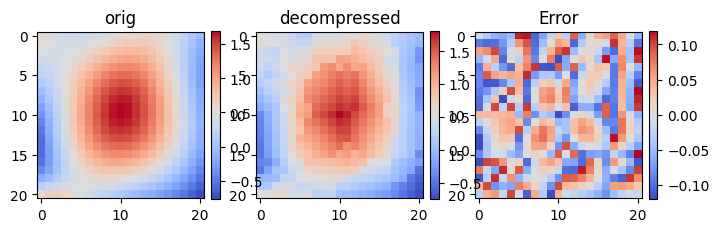

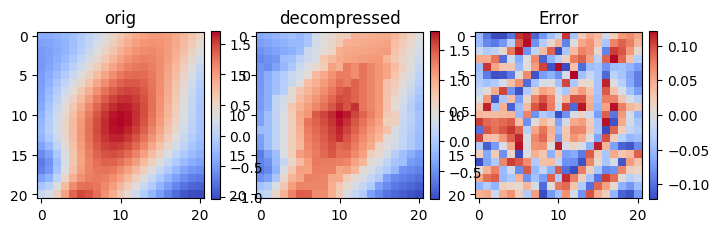

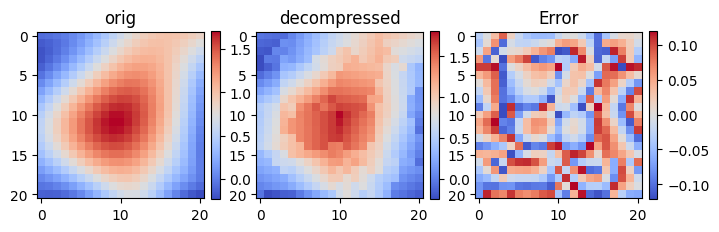

In [76]:
id = 1
index = match_index[id]
print(index)
idx = index//(1008*352)
idy = (index//352)%1008
idz = index%352
print(idx,idy,idz)

win = 10
plot3(p2000[idx],p2000_reg[idx],idy,idz,win,0)

plot3(p2000[:,idy,:],p2000_reg[:,idy,:],idx,idz,win,0)

plot3(p2000[:,:,idz],p2000_reg[:,:,idz],idx,idy,win,0)
mapwin = 1
print("emap\n",emap[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("emap\n",emap[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("emap\n",emap[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])
print("dmap\n",dmap[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("dmap\n",dmap[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("dmap\n",dmap[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

228408696
643 744 120
original.shape (21, 21)
original.shape (21, 21)
original.shape (21, 21)
emap
 [[ 0  2 -4]
 [ 4  6  4]
 [-2  4  0]]
emap
 [[ 0  4  2]
 [ 4  6  4]
 [-2  4  0]]
emap
 [[-6  2 -6]
 [ 4  6  4]
 [-2  4  0]]


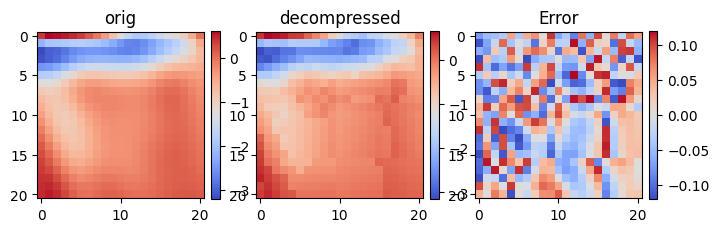

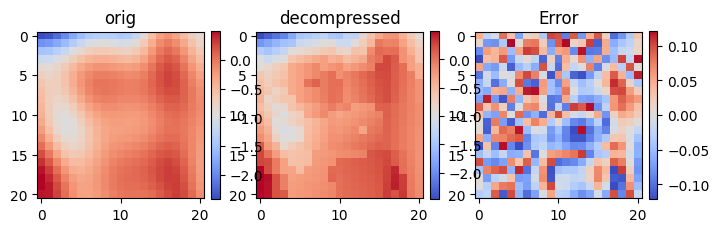

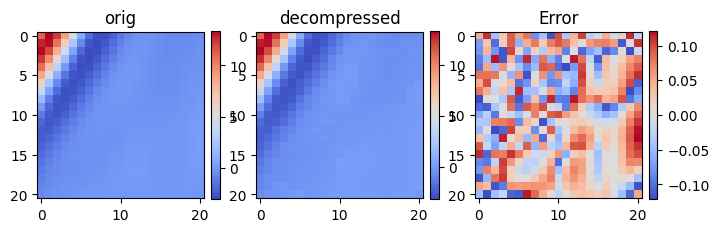

In [70]:
id = 400
index = match_index[id]
print(index)
idx = index//(1008*352)
idy = (index//352)%1008
idz = index%352
print(idx,idy,idz)

win = 10
plot3(p2000[idx],p2000_reg[idx],idy,idz,win,0)

plot3(p2000[:,idy,:],p2000_reg[:,idy,:],idx,idz,win,0)

plot3(p2000[:,:,idz],p2000_reg[:,:,idz],idx,idy,win,0)
mapwin = 1
print("emap\n",emap[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("emap\n",emap[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("emap\n",emap[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])


In [31]:
print("dmap\n",dmap[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("dmap\n",dmap[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("dmap\n",dmap[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

dmap
 [[ 2  4 -2]
 [ 4  6  4]
 [ 2  4  0]]
dmap
 [[-4  4 -2]
 [ 4  6  4]
 [ 2  4 -4]]
dmap
 [[ 0  4 -2]
 [ 4  6  4]
 [ 0  4  0]]


In [28]:
print("p2000_reg\n",p2000_reg[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("p2000_reg\n",p2000_reg[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("p2000_reg\n",p2000_reg[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

p2000_reg
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
p2000_reg
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
p2000_reg
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


125761343
354 444 191
original.shape (21, 21)
original.shape (21, 21)
original.shape (21, 21)
emap
 [[ 0 -4  0]
 [-4 -6 -4]
 [-2 -4 -2]]
emap
 [[ 0 -4 -2]
 [-4 -6 -4]
 [-2 -4  0]]
emap
 [[-2 -4  2]
 [-4 -6 -4]
 [-2 -4 -2]]


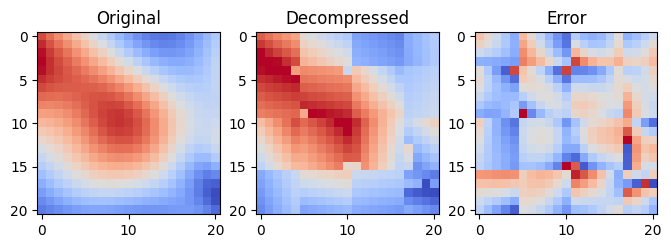

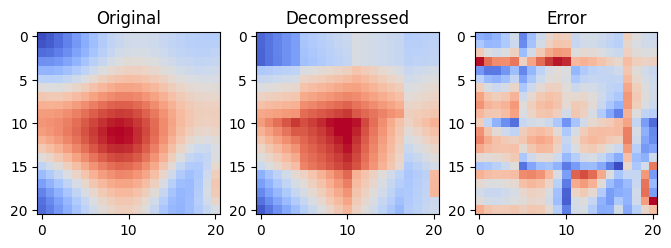

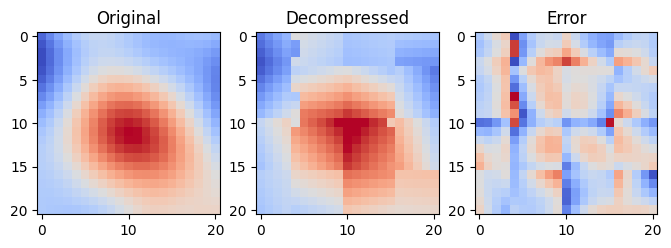

In [77]:
id = 200
index = match_index[id]
print(index)
idx = index//(1008*352)
idy = (index//352)%1008
idz = index%352
print(idx,idy,idz)

win = 10
plot3(p2000[idx],p2000_reg[idx],idy,idz,win,1)

plot3(p2000[:,idy,:],p2000_reg[:,idy,:],idx,idz,win,1)

plot3(p2000[:,:,idz],p2000_reg[:,:,idz],idx,idy,win,1)
mapwin = 1
print("emap\n",emap[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("emap\n",emap[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("emap\n",emap[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

In [78]:
print("dmap\n",dmap[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("dmap\n",dmap[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("dmap\n",emap[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

dmap
 [[ 0 -1 -1]
 [ 0  1  1]
 [ 0  0  0]]
dmap
 [[1 0 0]
 [1 1 1]
 [1 1 1]]
dmap
 [[-2 -4  2]
 [-4 -6 -4]
 [-2 -4 -2]]


In [55]:
print("error\n",error[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("error\n",error[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("error\n",error[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

error
 [[0.00751445 0.01245973 0.00840962]
 [0.01204752 0.01722896 0.0122737 ]
 [0.00836809 0.01066924 0.00617641]]
error
 [[0.00782092 0.01204752 0.007208  ]
 [0.01222479 0.01722896 0.01148965]
 [0.00805443 0.0122737  0.00742846]]
error
 [[0.00819076 0.01245973 0.00761719]
 [0.01222479 0.01722896 0.01148965]
 [0.00668327 0.01066924 0.00597712]]


In [57]:
print("decompressed\n",p2000_reg[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("decompressed\n",p2000_reg[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("decompressed\n",p2000_reg[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

decompressed
 [[0.00751445 0.01245973 0.00840962]
 [0.01204752 0.01722896 0.0122737 ]
 [0.00836809 0.01066924 0.00617641]]
decompressed
 [[0.00782092 0.01204752 0.007208  ]
 [0.01222479 0.01722896 0.01148965]
 [0.00805443 0.0122737  0.00742846]]
decompressed
 [[0.00819076 0.01245973 0.00761719]
 [0.01222479 0.01722896 0.01148965]
 [0.00668327 0.01066924 0.00597712]]
